In [75]:
#import packages
from __future__ import division 
import sys
import pandas as pd
import numpy as np
import scipy
from numpy import mean, std, cov 
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
import scipy.stats as stats 
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev


In [76]:
#import excel file containing data summary

ALL_wtpdata = pd.read_csv(r'ALL_data_WTP_01212022.csv', encoding='utf-8-sig')
pd.set_option("display.max_rows", None, "display.max_columns", None)
# print(wtpdata)
print('Balanced')
print('------------------------------------------------------------')

bal_wtpdata = ALL_wtpdata.loc[(ALL_wtpdata['balanced'] == 1)]
bal_wtpdata= bal_wtpdata.reset_index(drop=True)
print(bal_wtpdata)
print('------------------------------------------------------------')

print('Unbalanced')
print('------------------------------------------------------------')
unbal_wtpdata = ALL_wtpdata.loc[(ALL_wtpdata['balanced'] == 0)]
unbal_wtpdata= unbal_wtpdata.reset_index(drop=True)
print(unbal_wtpdata)

Balanced
------------------------------------------------------------
     Unnamed: 0               participant  balanced  avg_spent_social  \
0             3  56259489ed6e5a0005c80fde         1          0.026250   
1             7  58060d08b869700001d70b8c         1          0.030357   
2             9  5914b7b50a4b9d0001add64f         1          0.020870   
3            10  5a78e410ae9a0b0001a97274         1          0.036190   
4            11  5adbc051f6b58c0001fa3bbe         1          0.031111   
5            12  5af529ca222e4d0001878444         1          0.024286   
6            13  5b48f2d0ff7497000125165e         1          0.030833   
7            14  5bb0c112a1c73d0001b9ce9e         1          0.031875   
8            15  5beaed3f0af61d0001968d9a         1          0.033846   
9            16  5bfadc1846911f0001d7d1eb         1          0.035333   
10           17  5c1a8a5e2a85450001a878cd         1          0.023333   
11           18  5c3cd553c21f060001c3e571         1   

In [77]:
#sample size
n = len(ALL_wtpdata)
print(n)

bal_n = len(bal_wtpdata)
print(bal_n)

unbal_n = len(unbal_wtpdata)
print(unbal_n)


274
207
67


In [78]:
print('Balanced')
bal_social_sum= bal_wtpdata.total_spent_social
#calculate group mean for prop of chosen social experiences
bal_social_sum_M = mean(bal_social_sum)
print('mean: %.12f'% (bal_social_sum_M))


print('Unbalanced')
unbal_social_sum= unbal_wtpdata.total_spent_social
#calculate group mean for prop of chosen social experiences
unbal_social_sum_M = mean(unbal_social_sum)
print('mean: %.12f'% (unbal_social_sum_M))


Balanced
mean: 0.737971014493
Unbalanced
mean: 0.780298507463


In [79]:
print('Balanced')
bal_nonsocial_sum= bal_wtpdata.total_spent_nonsocial
#calculate group mean for prop of chosen social experiences
bal_nonsocial_sum_M = mean(bal_nonsocial_sum)
print('mean: %.12f'% (bal_nonsocial_sum_M))


print('Unbalanced')
unbal_nonsocial_sum= unbal_wtpdata.total_spent_nonsocial
#calculate group mean for prop of chosen social experiences
unbal_nonsocial_sum_M = mean(unbal_nonsocial_sum)
print('mean: %.12f'% (unbal_nonsocial_sum_M))

Balanced
mean: 0.709130434783
Unbalanced
mean: 0.654477611940


In [80]:
print('Balanced')


# sum squared difference between observations
bal_d1 = sum([(bal_social_sum[i]-bal_nonsocial_sum[i])**2 for i in range(bal_n)])
# sum difference between observations
bal_d2 = sum([bal_social_sum[i]-bal_nonsocial_sum[i] for i in range(bal_n)])
print(bal_d1,bal_d2)

print('Unbalanced')

# sum squared difference between observations
unbal_d1 = sum([(unbal_social_sum[i]-unbal_nonsocial_sum[i])**2 for i in range(unbal_n)])
# sum difference between observations
unbal_d2 = sum([unbal_social_sum[i]-unbal_nonsocial_sum[i] for i in range(unbal_n)])
print(unbal_d1,unbal_d2)



Balanced
46.5677 5.969999999999997
Unbalanced
11.103899999999998 8.430000000000001


In [81]:
print('Balanced')

# standard deviation of the difference between means
bal_standev = np.sqrt((bal_d1 - (bal_d2**2 / bal_n)) / (bal_n - 1))
print(bal_standev)


print('Unbalanced')
unbal_standev = np.sqrt((unbal_d1 - (unbal_d2**2 / unbal_n)) / (unbal_n - 1))
print(unbal_standev)

Balanced
0.47457452451239646
Unbalanced
0.39008992457346464


In [82]:
print('Balanced')


#calculate standard error of the difference between the means
bal_sed = bal_standev / np.sqrt(bal_n)
print(bal_sed)


print('Unbalanced')

unbal_sed = unbal_standev / np.sqrt(unbal_n)
print(unbal_sed)

Balanced
0.03298520963503907
Unbalanced
0.04765706933413319


In [83]:
print('Balanced')
#calculate t stat
bal_t_stat = (bal_social_sum_M - bal_nonsocial_sum_M) / bal_sed
print(bal_t_stat)


print('Unbalanced')

# calculate the t statistic
unbal_t_stat = (unbal_social_sum_M - unbal_nonsocial_sum_M) / unbal_sed
print(unbal_t_stat)

Balanced
0.8743488378351397
Unbalanced
2.6401307776655916


In [84]:
print('Balanced')

# degrees of freedom
bal_df = bal_n - 1
print(bal_df)
alpha= 0.05

print('Unbalanced')


unbal_df = unbal_n - 1
print(unbal_df)
alpha= 0.05

Balanced
206
Unbalanced
66


In [85]:

print('Balanced')

# calculate the critical value
bal_cv = t.ppf(1.0 - alpha, bal_df)
# calculate the p-value
bal_p = (1.0 - t.cdf(abs(bal_t_stat), bal_df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (bal_t_stat, bal_df, bal_cv, bal_p))
# interpret via critical value
if abs(bal_t_stat) <= bal_cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if bal_p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')




Balanced
t=0.874, df=206, cv=1.652, p=0.383
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


In [86]:
print('Unbalanced')

# calculate the critical value
unbal_cv = t.ppf(1.0 - alpha, unbal_df)
# calculate the p-value
unbal_p = (1.0 - t.cdf(abs(unbal_t_stat), unbal_df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (unbal_t_stat, unbal_df, unbal_cv, unbal_p))
# interpret via critical value
if abs(unbal_t_stat) <= unbal_cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if unbal_p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Unbalanced
t=2.640, df=66, cv=1.668, p=0.010
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


In [134]:
bal_wtp_long= pd.read_csv(r'BALANCED_LONG_02_25_22.csv')

unbal_wtp_long= pd.read_csv(r'UNBALANCED_LONG_02_25_22.csv')

Balanced


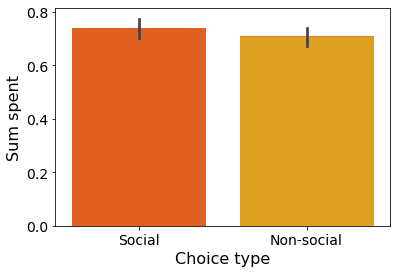

In [133]:
print('Balanced')

bal_wtp_sum_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'mean_sum': [bal_social_sum_M, bal_nonsocial_sum_M]})

bal_wtp_plot = sns.barplot(x=bal_wtp_sum_means.experience_type, y=bal_wtp_sum_means.mean_sum, data=bal_wtp_sum_means)



#wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})

#wtp_plot = sns.barplot(x="experience_type", y="average_spent", data=wtp_means)
wtp_plot = sns.barplot(x="S_NS", y="sum_spent", data=bal_wtp_long, palette= "autumn")
#plt3.set_title('DMN-VS Connectivity: Friend Reciprocate - Friend Defect',fontsize = 16)
wtp_plot.set_xlabel('Choice type',fontsize=16)
wtp_plot.set_ylabel('Sum spent',fontsize=16)
wtp_plot.tick_params(labelsize=14)
wtp_plot.figure.savefig('bal_choicetype_sumspent.svg')

Unbalanced


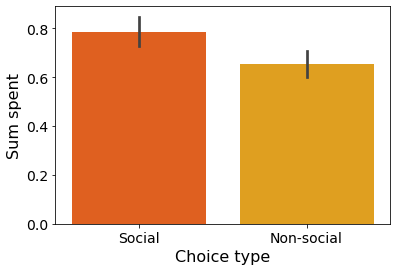

In [135]:
print('Unbalanced')

unbal_wtp_sum_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'mean_sum': [unbal_social_sum_M, unbal_nonsocial_sum_M]})

unbal_wtp_plot = sns.barplot(x=unbal_wtp_sum_means.experience_type, y=unbal_wtp_sum_means.mean_sum, data=unbal_wtp_sum_means)



#wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})

#wtp_plot = sns.barplot(x="experience_type", y="average_spent", data=wtp_means)
wtp_plot = sns.barplot(x="S_NS", y="sum_spent", data=unbal_wtp_long, palette= "autumn")
#plt3.set_title('DMN-VS Connectivity: Friend Reciprocate - Friend Defect',fontsize = 16)
wtp_plot.set_xlabel('Choice type',fontsize=16)
wtp_plot.set_ylabel('Sum spent',fontsize=16)
wtp_plot.tick_params(labelsize=14)
wtp_plot.figure.savefig('unbal_choicetype_sumspent.svg')


In [89]:
#### t stat for proportions ####

In [90]:
print('Balanced')

bal_prop_social= bal_wtpdata.prop_social
#calculate group mean for prop of chosen social experiences
bal_prop_soc_M = mean(bal_prop_social)
print('mean: %.12f'% (bal_prop_soc_M))


bal_prop_nonsocial= bal_wtpdata.prop_nonsocial
#calculate group mean for prop of chosen social experiences
bal_prop_nonsoc_M = mean(bal_prop_nonsocial)
print('mean: %.12f'% (bal_prop_nonsoc_M))

print('Unbalanced')
unbal_prop_social= unbal_wtpdata.prop_social
#calculate group mean for prop of chosen social experiences
unbal_prop_soc_M = mean(unbal_prop_social)
print('mean: %.12f'% (unbal_prop_soc_M))


unbal_prop_nonsocial= unbal_wtpdata.prop_nonsocial
#calculate group mean for prop of chosen social experiences
unbal_prop_nonsoc_M = mean(unbal_prop_nonsocial)
print('mean: %.12f'% (unbal_prop_nonsoc_M))

Balanced
mean: 0.507606438986
mean: 0.492393561014
Unbalanced
mean: 0.524614618687
mean: 0.475385381313


In [91]:
print('Balanced')

#Calculate STD
# sum squared difference between observations
bal_d1 = sum([(bal_prop_social[i]-bal_prop_nonsocial[i])**2 for i in range(bal_n)])
# sum difference between observations
bal_d2 = sum([bal_prop_social[i]-bal_prop_nonsocial[i] for i in range(bal_n)])
print(bal_d1,bal_d2)

# standard deviation of the difference between means
bal_standev = np.sqrt((bal_d1 - (bal_d2**2 / bal_n)) / (bal_n - 1))
print(bal_standev)

print('Unbalanced')
unbal_d1 = sum([(unbal_prop_social[i]-unbal_prop_nonsocial[i])**2 for i in range(unbal_n)])
# sum difference between observations
unbal_d2 = sum([unbal_prop_social[i]-unbal_prop_nonsocial[i] for i in range(unbal_n)])
print(unbal_d1,unbal_d2)

# standard deviation of the difference between means
unbal_standev = np.sqrt((unbal_d1 - (unbal_d2**2 / unbal_n)) / (unbal_n - 1))
print(unbal_standev)

Balanced
20.71669531093392 3.14906574
0.3167553108964547
Unbalanced
5.0323397127614165 3.2983589039999996
0.27163824036074513


In [92]:
print('Balanced')

#calculate standard error of the difference between the means
bal_sed = bal_standev / np.sqrt(bal_n)
print(bal_sed)




print('Unbalanced')

unbal_sed = unbal_standev / np.sqrt(unbal_n)
print(unbal_sed)


Balanced
0.022016016017013598
Unbalanced
0.033185892890796716


In [93]:

print('Balanced')

# calculate the t statistic
bal_t_stat = (bal_prop_soc_M - bal_prop_nonsoc_M) / bal_sed
print(bal_t_stat)

print('Unbalanced')
# calculate the t statistic
unbal_t_stat = (unbal_prop_soc_M - unbal_prop_nonsoc_M) / unbal_sed
print(unbal_t_stat)



Balanced
0.690991410946388
Unbalanced
1.4834386868881537


In [94]:
print('Balanced')
# degrees of freedom
bal_df = bal_n - 1
print(bal_df)
alpha= 0.05


print('Unbalanced')
# degrees of freedom
unbal_df = unbal_n - 1
print(unbal_df)
alpha= 0.05


Balanced
206
Unbalanced
66


In [95]:
print('Balanced')

# calculate the critical value
bal_cv = t.ppf(1.0 - alpha, bal_df)
# calculate the p-value
bal_p = (1.0 - t.cdf(abs(bal_t_stat), bal_df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (bal_t_stat, bal_df, bal_cv, bal_p))
# interpret via critical value
if abs(bal_t_stat) <= bal_cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if bal_p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Balanced
t=0.691, df=206, cv=1.652, p=0.490
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


In [96]:

print('Unbalanced')

# calculate the critical value
unbal_cv = t.ppf(1.0 - alpha, unbal_df)
# calculate the p-value
unbal_p = (1.0 - t.cdf(abs(unbal_t_stat), unbal_df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (unbal_t_stat, unbal_df, unbal_cv, unbal_p))
# interpret via critical value
if abs(unbal_t_stat) <= unbal_cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if unbal_p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')


Unbalanced
t=1.483, df=66, cv=1.668, p=0.143
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


Balanced


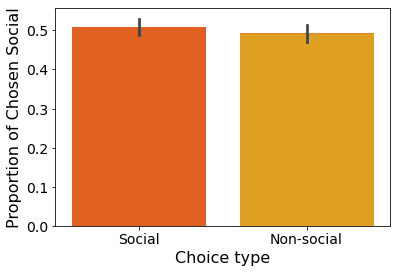

In [139]:

print('Balanced')

bal_wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'prop_chosen': [bal_prop_soc_M, bal_prop_nonsoc_M]})

bal_wtp_plot = sns.barplot(x=bal_wtp_means.experience_type, y=bal_wtp_means.prop_chosen, data=bal_wtp_means)

#wtp_plot = sns.barplot(x="experience_type", y="average_spent", data=wtp_means)
wtp_plot = sns.barplot(x="S_NS", y="prop", data=bal_wtp_long, palette= "autumn")
#plt3.set_title('DMN-VS Connectivity: Friend Reciprocate - Friend Defect',fontsize = 16)
wtp_plot.set_xlabel('Choice type',fontsize=16)
wtp_plot.set_ylabel('Proportion of Chosen Social',fontsize=16)
wtp_plot.tick_params(labelsize=14)
wtp_plot.figure.savefig('bal_choicetype_propsocial.svg')

Unbalanced


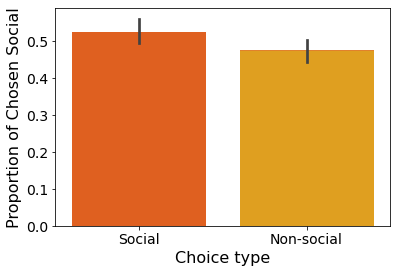

In [138]:

print('Unbalanced')
unbal_wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'prop_chosen': [unbal_prop_soc_M, unbal_prop_nonsoc_M]})

unbal_wtp_plot = sns.barplot(x=unbal_wtp_means.experience_type, y=unbal_wtp_means.prop_chosen, data=unbal_wtp_means)

wtp_plot = sns.barplot(x="S_NS", y="prop", data=unbal_wtp_long, palette= "autumn")
#plt3.set_title('DMN-VS Connectivity: Friend Reciprocate - Friend Defect',fontsize = 16)
wtp_plot.set_xlabel('Choice type',fontsize=16)
wtp_plot.set_ylabel('Proportion of Chosen Social',fontsize=16)
wtp_plot.tick_params(labelsize=14)
wtp_plot.figure.savefig('unbal_choicetype_propsocial.svg')


In [99]:
bal_prop_social = bal_wtpdata['prop_social']
bal_aq = bal_wtpdata.AQ #autism quotient
bal_mspss = bal_wtpdata.MSPSS #perceived social support
bal_iri_pd = bal_wtpdata.IRI_PD
bal_iri_fs= bal_wtpdata.IRI_FS
bal_iri_ec= bal_wtpdata.IRI_EC
bal_iri_pt=bal_wtpdata.IRI_PT

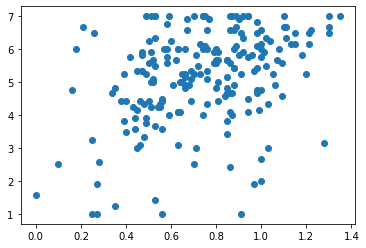

[[0.06806577 0.13292886]
 [0.13292886 1.96285776]]
Pearsons correlation: 0.364
p value: 0.0000
Reject the null hypothesis that the means are equal.
Balanced


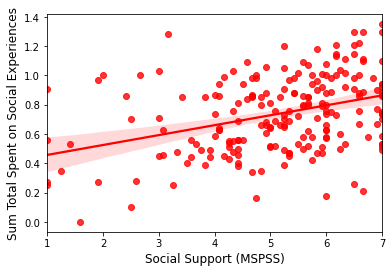

In [100]:
#sum of social / mulitdimensional scale of perceived social support
pyplot.scatter(bal_social_sum, bal_mspss)
pyplot.show()
bal_covariance = cov(bal_social_sum, bal_mspss)
print(bal_covariance)
corr, _ = pearsonr(bal_social_sum, bal_mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(bal_social_sum, bal_mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

print('Balanced')
bal_sum_mspss = sns.regplot(x="MSPSS", y="total_spent_social", data=bal_wtpdata,color="red");
bal_sum_mspss.set_ylabel('Sum Total Spent on Social Experiences',fontsize=12)
bal_sum_mspss.set_xlabel('Social Support (MSPSS)',fontsize=12)
bal_sum_mspss.figure.savefig('bal_sum_mspss_scatter.svg')

207
207


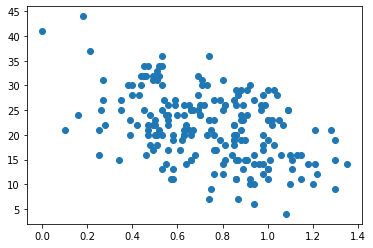

[[ 0.06806577 -0.81698537]
 [-0.81698537 48.96965433]]
Pearsons correlation: -0.447
p value: 0.0000
Reject the null hypothesis that the means are equal.


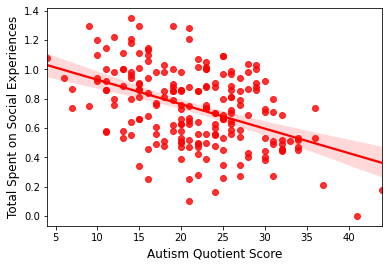

In [101]:
#sum of social / aq
print(len(bal_social_sum))
print(len(bal_aq))
pyplot.scatter(bal_social_sum, bal_aq)
pyplot.show()
bal_covariance = cov(bal_social_sum, bal_aq)
print(bal_covariance)
corr, _ = pearsonr(bal_social_sum, bal_aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(bal_social_sum, bal_aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
bal_sum_aq= sns.regplot(x="AQ", y="total_spent_social", data=bal_wtpdata,color="red");
bal_sum_aq.set_xlabel('Autism Quotient Score',fontsize=12)
bal_sum_aq.set_ylabel('Total Spent on Social Experiences',fontsize=12)
bal_sum_aq.figure.savefig('bal_sum_aq_scatter.svg')

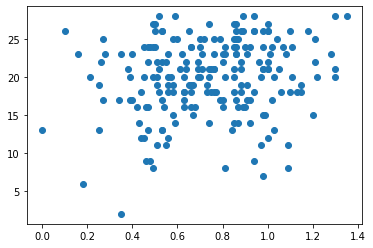

[[ 0.06806577  0.22503588]
 [ 0.22503588 24.81975517]]
Pearsons correlation: 0.173
p value: 0.0126
Reject the null hypothesis that the means are equal.


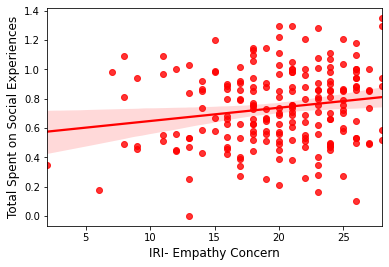

In [102]:
#sum of social  / iri ec

pyplot.scatter(bal_social_sum, bal_iri_ec)
pyplot.show()
bal_covariance = cov(bal_social_sum, bal_iri_ec)
print(bal_covariance)
corr, _ = pearsonr(bal_social_sum, bal_iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(bal_social_sum, bal_iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
bal_s_sum_iri_ec=sns.regplot(x="IRI_EC", y="total_spent_social", data=bal_wtpdata,color="red");
bal_s_sum_iri_ec.set_xlabel('IRI- Empathy Concern',fontsize=12)
bal_s_sum_iri_ec.set_ylabel('Total Spent on Social Experiences',fontsize=12)
bal_s_sum_iri_ec.figure.savefig('bal_sum_iri_ec_scatter.svg')

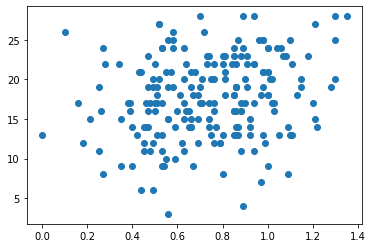

[[ 0.06806577  0.30317434]
 [ 0.30317434 26.74250739]]
Pearsons correlation: 0.225
p value: 0.0011
Reject the null hypothesis that the means are equal.


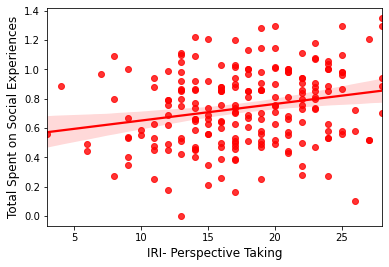

In [103]:
#sum of social  / iri pt

pyplot.scatter(bal_social_sum, bal_iri_pt)
pyplot.show()
bal_covariance = cov(bal_social_sum, bal_iri_pt)
print(bal_covariance)
corr, _ = pearsonr(bal_social_sum, bal_iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(bal_social_sum, bal_iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
bal_s_sum_iri_pt=sns.regplot(x="IRI_PT", y="total_spent_social", data=bal_wtpdata,color="red");
bal_s_sum_iri_pt.set_xlabel('IRI- Perspective Taking',fontsize=12)
bal_s_sum_iri_pt.set_ylabel('Total Spent on Social Experiences',fontsize=12)
bal_s_sum_iri_pt.figure.savefig('bal_sum_iri_pt_scatter.svg')

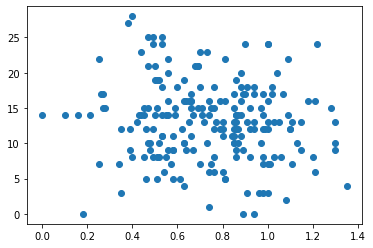

[[ 0.06806577 -0.16517307]
 [-0.16517307 31.32672014]]
Pearsons correlation: -0.113
p value: 0.1046
Accept null hypothesis that the means are equal.


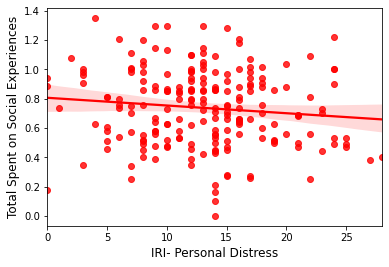

In [104]:
#sum of social  / iri pd

pyplot.scatter(bal_social_sum, bal_iri_pd)
pyplot.show()
bal_covariance = cov(bal_social_sum, bal_iri_pd)
print(bal_covariance)
corr, _ = pearsonr(bal_social_sum, bal_iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(bal_social_sum, bal_iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
bal_s_sum_iri_pd=sns.regplot(x="IRI_PD", y="total_spent_social", data=bal_wtpdata,color="red");
bal_s_sum_iri_pd.set_xlabel('IRI- Personal Distress',fontsize=12)
bal_s_sum_iri_pd.set_ylabel('Total Spent on Social Experiences',fontsize=12)
bal_s_sum_iri_pd.figure.savefig('bal_sum_iri_pd_scatter.svg')

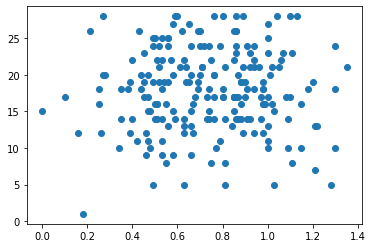

[[6.80657661e-02 2.44019980e-02]
 [2.44019980e-02 3.17518409e+01]]
Pearsons correlation: 0.017
p value: 0.8124
Accept null hypothesis that the means are equal.


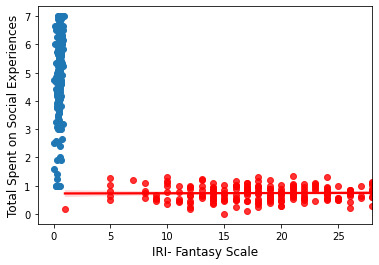

[[0.02508348 0.08177612]
 [0.08177612 1.96285776]]
Pearsons correlation: 0.369
p value: 0.0000
Reject the null hypothesis that the means are equal.


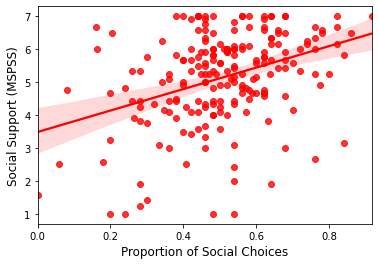

In [105]:
#sum of social  / iri fs

pyplot.scatter(bal_social_sum, bal_iri_fs)
pyplot.show()
bal_covariance = cov(bal_social_sum, bal_iri_fs)
print(bal_covariance)
corr, _ = pearsonr(bal_social_sum, bal_iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(bal_social_sum, bal_iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
bal_s_sum_iri_fs=sns.regplot(x="IRI_FS", y="total_spent_social", data=bal_wtpdata,color="red");
bal_s_sum_iri_fs.set_xlabel('IRI- Fantasy Scale',fontsize=12)
bal_s_sum_iri_fs.set_ylabel('Total Spent on Social Experiences',fontsize=12)
bal_s_sum_iri_fs.figure.savefig('bal_sum_iri_fs_scatter.svg')
## prop social // self report 

##### prop of chosen social // self report #####
#prop of chosen social // MSPSS
pyplot.scatter(bal_prop_social, bal_mspss)
pyplot.show()
bal_covariance = cov(bal_prop_social, bal_mspss)
print(bal_covariance)
corr, _ = pearsonr(bal_prop_social, bal_mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(bal_prop_social, bal_mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
bal_prop_mspss= sns.regplot(x="prop_social",y="MSPSS", data=bal_wtpdata,color="red");
bal_prop_mspss.set_xlabel('Proportion of Social Choices',fontsize=12)
bal_prop_mspss.set_ylabel('Social Support (MSPSS)',fontsize=12)
bal_prop_mspss.figure.savefig('bal_prop_mspss_scatter.svg')

In [106]:
## prop social // self report 

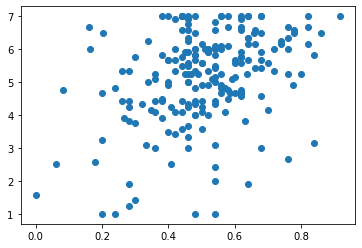

[[0.02508348 0.08177612]
 [0.08177612 1.96285776]]
Pearsons correlation: 0.369
p value: 0.0000
Reject the null hypothesis that the means are equal.


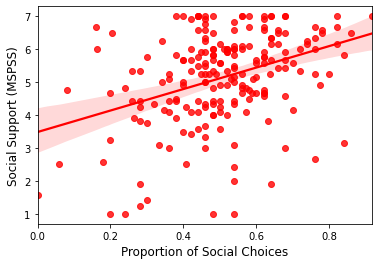

In [107]:
##### prop of chosen social // self report #####
#prop of chosen social // MSPSS
pyplot.scatter(bal_prop_social, bal_mspss)
pyplot.show()
bal_covariance = cov(bal_prop_social, bal_mspss)
print(bal_covariance)
corr, _ = pearsonr(bal_prop_social, bal_mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(bal_prop_social, bal_mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
bal_prop_mspss= sns.regplot(x="prop_social",y="MSPSS", data=bal_wtpdata,color="red");
bal_prop_mspss.set_xlabel('Proportion of Social Choices',fontsize=12)
bal_prop_mspss.set_ylabel('Social Support (MSPSS)',fontsize=12)
bal_prop_mspss.figure.savefig('bal_prop_mspss_scatter.svg')

In [108]:
 prop social // aq
pyplot.scatter(bal_prop_social, bal_aq)
pyplot.show()
bal_covariance = cov(bal_prop_social, bal_aq)
print(bal_covariance)
corr, _ = pearsonr(bal_prop_social, bal_aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(bal_prop_social, bal_aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
bal_prop_aq= sns.regplot(x="prop_social",y="AQ", data=bal_wtpdata,color="red");
bal_prop_aq.set_xlabel('Proportion of Social Choices',fontsize=12)
bal_prop_aq.set_ylabel('Autism Quotient Score',fontsize=12)
bal_prop_aq.figure.savefig('bal_prop_aq_scatter.svg')


SyntaxError: invalid syntax (<ipython-input-108-ad91595b267e>, line 1)

In [ ]:
# prop social // iri_ec
pyplot.scatter(bal_prop_social, bal_iri_ec)
pyplot.show()
bal_covariance = cov(bal_prop_social, bal_iri_ec)
print(bal_covariance)
corr, _ = pearsonr(bal_prop_social, bal_iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(bal_prop_social, bal_iri_ec)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
bal_prop_iri_ec= sns.regplot(x="prop_social",y="IRI_EC", data=bal_wtpdata,color="red");
bal_prop_iri_ec.set_xlabel('Proportion of Social Choices',fontsize=12)
bal_prop_iri_ec.set_ylabel('IRI - Empathy Concern',fontsize=12)
bal_prop_iri_ec.figure.savefig('bal_prop_iri_ec_scatter.svg')


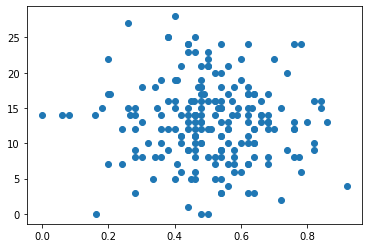

[[ 2.50834817e-02 -4.31942275e-02]
 [-4.31942275e-02  3.13267201e+01]]
Pearsons correlation: -0.049
p value: 0.4857
Accept null hypothesis that the means are equal.


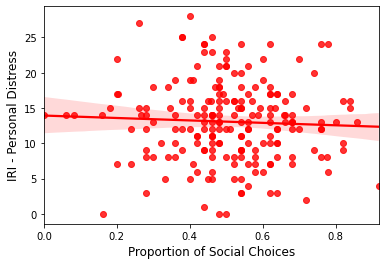

In [109]:
# prop social // iri_pd
pyplot.scatter(bal_prop_social, bal_iri_pd)
pyplot.show()
bal_covariance = cov(bal_prop_social, bal_iri_pd)
print(bal_covariance)
corr, _ = pearsonr(bal_prop_social, bal_iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(bal_prop_social, bal_iri_pd)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
bal_prop_iri_pd= sns.regplot(x="prop_social",y="IRI_PD", data=bal_wtpdata,color="red");
bal_prop_iri_pd.set_xlabel('Proportion of Social Choices',fontsize=12)
bal_prop_iri_pd.set_ylabel('IRI - Personal Distress',fontsize=12)
bal_prop_iri_pd.figure.savefig('bal_prop_iri_pd_scatter.svg')


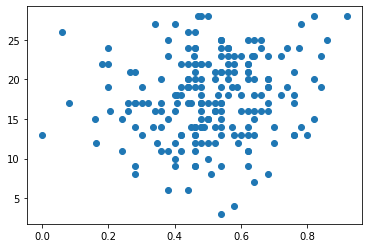

[[2.50834817e-02 1.21750717e-01]
 [1.21750717e-01 2.67425074e+01]]
Pearsons correlation: 0.149
p value: 0.0325
Reject the null hypothesis that the means are equal.


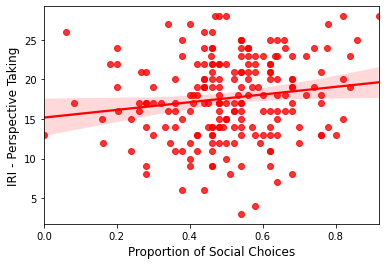

In [110]:
# prop social // iri_pt
pyplot.scatter(bal_prop_social, bal_iri_pt)
pyplot.show()
bal_covariance = cov(bal_prop_social, bal_iri_pt)
print(bal_covariance)
corr, _ = pearsonr(bal_prop_social, bal_iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(bal_prop_social, bal_iri_pt)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
bal_prop_iri_pt= sns.regplot(x="prop_social",y="IRI_PT", data=bal_wtpdata,color="red");
bal_prop_iri_pt.set_xlabel('Proportion of Social Choices',fontsize=12)
bal_prop_iri_pt.set_ylabel('IRI - Perspective Taking',fontsize=12)
bal_prop_iri_pt.figure.savefig('bal_prop_iri_pt_scatter.svg')



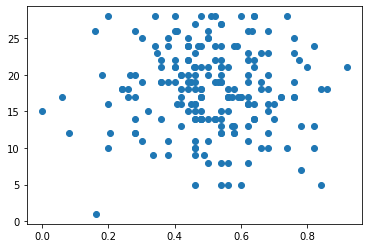

[[ 2.50834817e-02 -1.78106795e-02]
 [-1.78106795e-02  3.17518409e+01]]
Pearsons correlation: -0.020
p value: 0.7753
Accept null hypothesis that the means are equal.


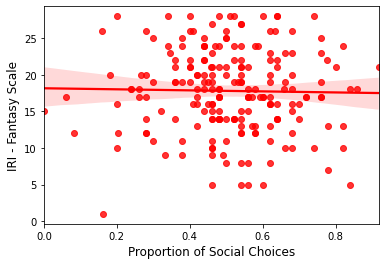

In [111]:
# prop social // iri_fs
pyplot.scatter(bal_prop_social, bal_iri_fs)
pyplot.show()
bal_covariance = cov(bal_prop_social, bal_iri_fs)
print(bal_covariance)
corr, _ = pearsonr(bal_prop_social, bal_iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(bal_prop_social, bal_iri_fs)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
bal_prop_iri_fs= sns.regplot(x="prop_social",y="IRI_FS", data=bal_wtpdata,color="red");
bal_prop_iri_fs.set_xlabel('Proportion of Social Choices',fontsize=12)
bal_prop_iri_fs.set_ylabel('IRI - Fantasy Scale',fontsize=12)
bal_prop_iri_fs.figure.savefig('bal_prop_iri_fs_scatter.svg')

In [112]:
### STUDY 1 - UNBALANCED PLOTS

In [113]:
unbal_prop_social = unbal_wtpdata['prop_social']
unbal_aq = unbal_wtpdata.AQ #autism quotient
unbal_mspss = unbal_wtpdata.MSPSS #perceived social support
unbal_iri_pd = unbal_wtpdata.IRI_PD
unbal_iri_fs= unbal_wtpdata.IRI_FS
unbal_iri_ec= unbal_wtpdata.IRI_EC
unbal_iri_pt=unbal_wtpdata.IRI_PT

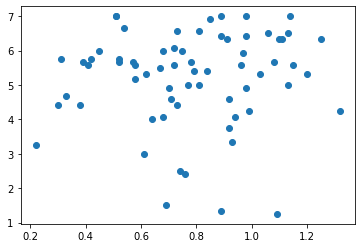

[[0.06637264 0.02277834]
 [0.02277834 1.8969609 ]]
Pearsons correlation: 0.064
p value: 0.6058
Accept null hypothesis that the means are equal.
Balanced


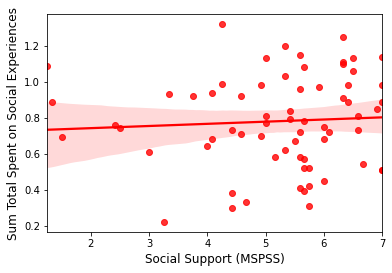

In [114]:
#sum of social / mulitdimensional scale of perceived social support
pyplot.scatter(unbal_social_sum, unbal_mspss)
pyplot.show()
unbal_covariance = cov(unbal_social_sum, unbal_mspss)
print(unbal_covariance)
corr, _ = pearsonr(unbal_social_sum, unbal_mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(unbal_social_sum, unbal_mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

print('Balanced')
unbal_sum_mspss = sns.regplot(x="MSPSS", y="total_spent_social", data=unbal_wtpdata,color="red");
unbal_sum_mspss.set_ylabel('Sum Total Spent on Social Experiences',fontsize=12)
unbal_sum_mspss.set_xlabel('Social Support (MSPSS)',fontsize=12)
unbal_sum_mspss.figure.savefig('unbal_sum_mspss_scatter.svg')

67
67


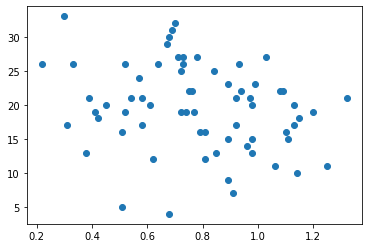

[[ 0.06637264 -0.3783763 ]
 [-0.3783763  40.32428765]]
Pearsons correlation: -0.231
p value: 0.0597
Reject the null hypothesis that the means are equal.


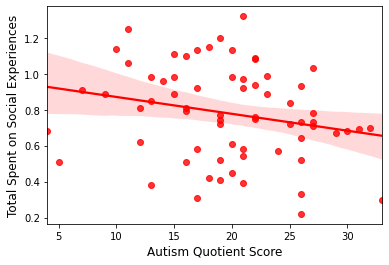

In [115]:
#sum of social / aq
print(len(unbal_social_sum))
print(len(unbal_aq))
pyplot.scatter(unbal_social_sum, unbal_aq)
pyplot.show()
unbal_covariance = cov(unbal_social_sum, unbal_aq)
print(unbal_covariance)
corr, _ = pearsonr(unbal_social_sum, unbal_aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(unbal_social_sum, unbal_aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
unbal_sum_aq= sns.regplot(x="AQ", y="total_spent_social", data=unbal_wtpdata,color="red");
unbal_sum_aq.set_xlabel('Autism Quotient Score',fontsize=12)
unbal_sum_aq.set_ylabel('Total Spent on Social Experiences',fontsize=12)
unbal_sum_aq.figure.savefig('unbal_sum_aq_scatter.svg')

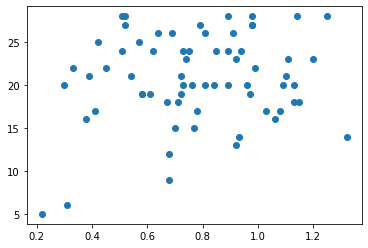

[[ 0.06637264  0.21992537]
 [ 0.21992537 26.76797829]]
Pearsons correlation: 0.165
p value: 0.1821
Accept null hypothesis that the means are equal.


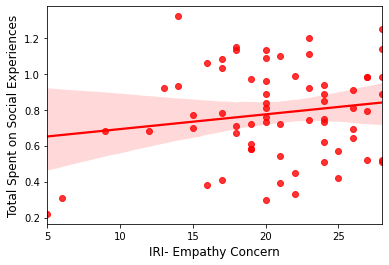

In [118]:
#sum of social  / iri ec

pyplot.scatter(unbal_social_sum, unbal_iri_ec)
pyplot.show()
unbal_covariance = cov(unbal_social_sum, unbal_iri_ec)
print(unbal_covariance)
corr, _ = pearsonr(unbal_social_sum, unbal_iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(unbal_social_sum, unbal_iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
unbal_s_sum_iri_ec=sns.regplot(x="IRI_EC", y="total_spent_social", data=unbal_wtpdata,color="red");
unbal_s_sum_iri_ec.set_xlabel('IRI- Empathy Concern',fontsize=12)
unbal_s_sum_iri_ec.set_ylabel('Total Spent on Social Experiences',fontsize=12)
unbal_s_sum_iri_ec.figure.savefig('unbal_sum_iri_ec_scatter.svg')


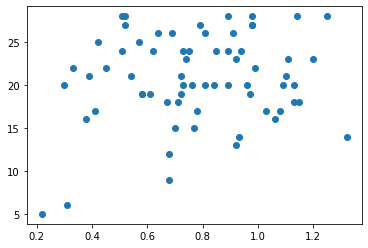

[[ 0.06637264  0.21992537]
 [ 0.21992537 26.76797829]]
Pearsons correlation: 0.165
p value: 0.1821
Accept null hypothesis that the means are equal.


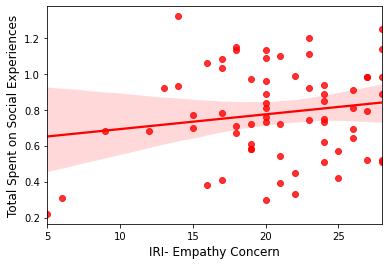

In [119]:
#sum of social  / iri ec

pyplot.scatter(unbal_social_sum, unbal_iri_ec)
pyplot.show()
unbal_covariance = cov(unbal_social_sum, unbal_iri_ec)
print(unbal_covariance)
corr, _ = pearsonr(unbal_social_sum, unbal_iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(unbal_social_sum, unbal_iri_ec)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
unbal_s_sum_iri_ec=sns.regplot(x="IRI_EC", y="total_spent_social", data=unbal_wtpdata,color="red");
unbal_s_sum_iri_ec.set_xlabel('IRI- Empathy Concern',fontsize=12)
unbal_s_sum_iri_ec.set_ylabel('Total Spent on Social Experiences',fontsize=12)
unbal_s_sum_iri_ec.figure.savefig('unbal_sum_iri_ec_scatter.svg')

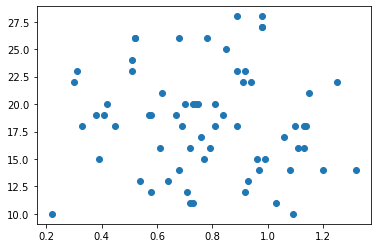

[[ 0.06637264 -0.09073722]
 [-0.09073722 22.70375396]]
Pearsons correlation: -0.074
p value: 0.5522
Accept null hypothesis that the means are equal.


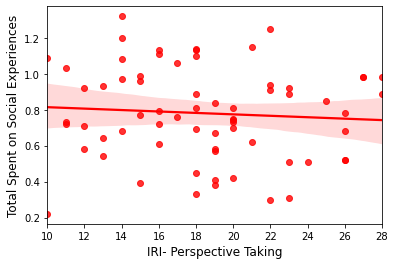

In [120]:
#sum of social  / iri pt

pyplot.scatter(unbal_social_sum, unbal_iri_pt)
pyplot.show()
unbal_covariance = cov(unbal_social_sum, unbal_iri_pt)
print(unbal_covariance)
corr, _ = pearsonr(unbal_social_sum, unbal_iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(unbal_social_sum, unbal_iri_pt)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
unbal_s_sum_iri_pt=sns.regplot(x="IRI_PT", y="total_spent_social", data=unbal_wtpdata,color="red");
unbal_s_sum_iri_pt.set_xlabel('IRI- Perspective Taking',fontsize=12)
unbal_s_sum_iri_pt.set_ylabel('Total Spent on Social Experiences',fontsize=12)
unbal_s_sum_iri_pt.figure.savefig('unbal_sum_iri_pt_scatter.svg')

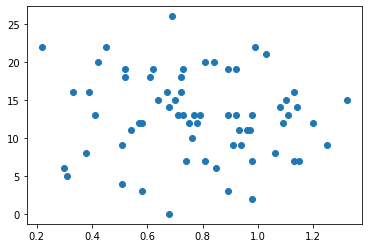

[[ 0.06637264 -0.14602442]
 [-0.14602442 30.28855721]]
Pearsons correlation: -0.103
p value: 0.4069
Accept null hypothesis that the means are equal.


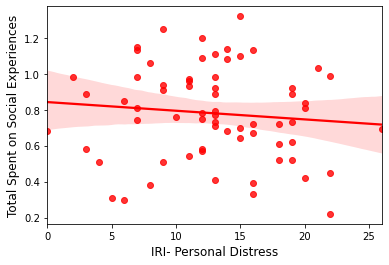

In [121]:
#sum of social  / iri pd

pyplot.scatter(unbal_social_sum, unbal_iri_pd)
pyplot.show()
unbal_covariance = cov(unbal_social_sum, unbal_iri_pd)
print(unbal_covariance)
corr, _ = pearsonr(unbal_social_sum, unbal_iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(unbal_social_sum, unbal_iri_pd)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
unbal_s_sum_iri_pd=sns.regplot(x="IRI_PD", y="total_spent_social", data=unbal_wtpdata,color="red");
unbal_s_sum_iri_pd.set_xlabel('IRI- Personal Distress',fontsize=12)
unbal_s_sum_iri_pd.set_ylabel('Total Spent on Social Experiences',fontsize=12)
unbal_s_sum_iri_pd.figure.savefig('unbal_sum_iri_pd_scatter.svg')

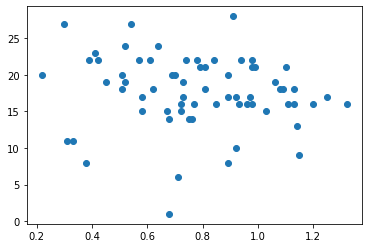

[[ 0.06637264 -0.1615536 ]
 [-0.1615536  24.14654003]]
Pearsons correlation: -0.128
p value: 0.3034
Accept null hypothesis that the means are equal.


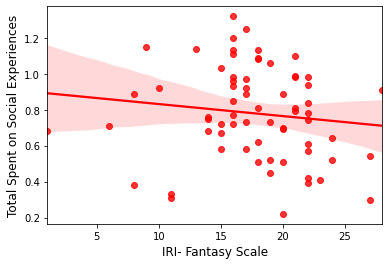

In [122]:
#sum of social  / iri fs

pyplot.scatter(unbal_social_sum, unbal_iri_fs)
pyplot.show()
unbal_covariance = cov(unbal_social_sum, unbal_iri_fs)
print(unbal_covariance)
corr, _ = pearsonr(unbal_social_sum, unbal_iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(unbal_social_sum, unbal_iri_fs)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
unbal_s_sum_iri_fs=sns.regplot(x="IRI_FS", y="total_spent_social", data=unbal_wtpdata,color="red");
unbal_s_sum_iri_fs.set_xlabel('IRI- Fantasy Scale',fontsize=12)
unbal_s_sum_iri_fs.set_ylabel('Total Spent on Social Experiences',fontsize=12)
unbal_s_sum_iri_fs.figure.savefig('unbal_sum_iri_fs_scatter.svg')

In [123]:
##### prop of chosen social // self report #####

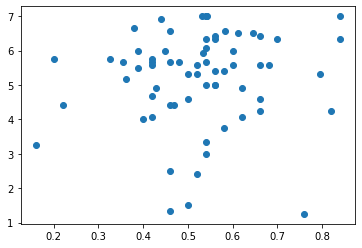

[[0.01844683 0.01697908]
 [0.01697908 1.8969609 ]]
Pearsons correlation: 0.091
p value: 0.4651
Accept null hypothesis that the means are equal.


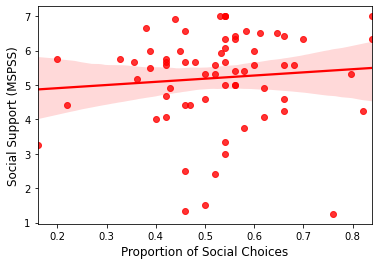

In [124]:
#prop of chosen social // MSPSS
pyplot.scatter(unbal_prop_social, unbal_mspss)
pyplot.show()
unbal_covariance = cov(unbal_prop_social, unbal_mspss)
print(unbal_covariance)
corr, _ = pearsonr(unbal_prop_social, unbal_mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(unbal_prop_social, unbal_mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
unbal_prop_mspss= sns.regplot(x="prop_social",y="MSPSS", data=unbal_wtpdata,color="red");
unbal_prop_mspss.set_xlabel('Proportion of Social Choices',fontsize=12)
unbal_prop_mspss.set_ylabel('Social Support (MSPSS)',fontsize=12)
unbal_prop_mspss.figure.savefig('unbal_prop_mspss_scatter.svg')

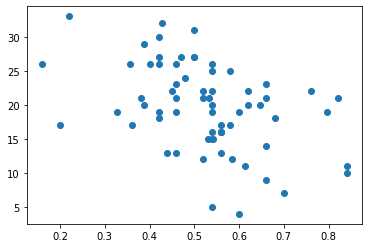

[[ 1.84468334e-02 -3.76849646e-01]
 [-3.76849646e-01  4.03242877e+01]]
Pearsons correlation: -0.437
p value: 0.0002
Reject the null hypothesis that the means are equal.


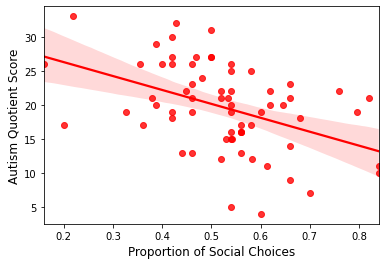

In [125]:
# prop social // aq
pyplot.scatter(unbal_prop_social, unbal_aq)
pyplot.show()
unbal_covariance = cov(unbal_prop_social, unbal_aq)
print(unbal_covariance)
corr, _ = pearsonr(unbal_prop_social, unbal_aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(unbal_prop_social, unbal_aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
unbal_prop_aq= sns.regplot(x="prop_social",y="AQ", data=unbal_wtpdata,color="red");
unbal_prop_aq.set_xlabel('Proportion of Social Choices',fontsize=12)
unbal_prop_aq.set_ylabel('Autism Quotient Score',fontsize=12)
unbal_prop_aq.figure.savefig('unbal_prop_aq_scatter.svg')

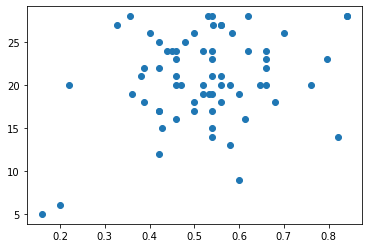

[[1.84468334e-02 1.98981723e-01]
 [1.98981723e-01 2.67679783e+01]]
Pearsons correlation: 0.283
p value: 0.0202
Reject the null hypothesis that the means are equal.


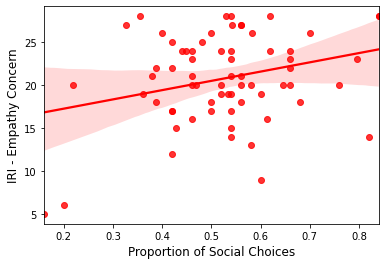

In [126]:
# prop social // iri_ec
pyplot.scatter(unbal_prop_social, unbal_iri_ec)
pyplot.show()
unbal_covariance = cov(unbal_prop_social, unbal_iri_ec)
print(unbal_covariance)
corr, _ = pearsonr(unbal_prop_social, unbal_iri_ec)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(unbal_prop_social, unbal_iri_ec)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
unbal_prop_iri_ec= sns.regplot(x="prop_social",y="IRI_EC", data=unbal_wtpdata,color="red");
unbal_prop_iri_ec.set_xlabel('Proportion of Social Choices',fontsize=12)
unbal_prop_iri_ec.set_ylabel('IRI - Empathy Concern',fontsize=12)
unbal_prop_iri_ec.figure.savefig('unbal_prop_iri_ec_scatter.svg')

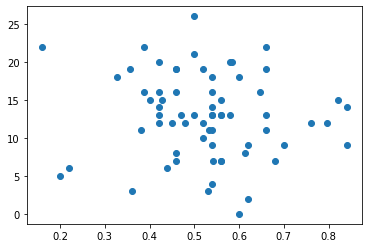

[[ 1.84468334e-02 -6.83635165e-02]
 [-6.83635165e-02  3.02885572e+01]]
Pearsons correlation: -0.091
p value: 0.4617
Accept null hypothesis that the means are equal.


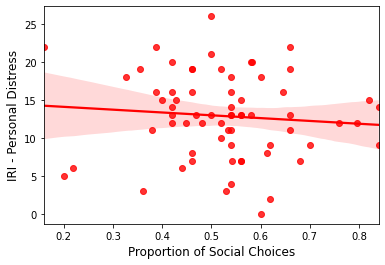

In [127]:
# prop social // iri_pd
pyplot.scatter(unbal_prop_social, unbal_iri_pd)
pyplot.show()
unbal_covariance = cov(unbal_prop_social, unbal_iri_pd)
print(unbal_covariance)
corr, _ = pearsonr(unbal_prop_social, unbal_iri_pd)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(unbal_prop_social, unbal_iri_pd)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
unbal_prop_iri_pd= sns.regplot(x="prop_social",y="IRI_PD", data=unbal_wtpdata,color="red");
unbal_prop_iri_pd.set_xlabel('Proportion of Social Choices',fontsize=12)
unbal_prop_iri_pd.set_ylabel('IRI - Personal Distress',fontsize=12)
unbal_prop_iri_pd.figure.savefig('unbal_prop_iri_pd_scatter.svg')

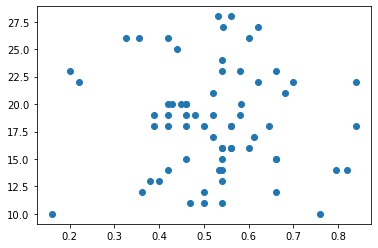

[[ 1.84468334e-02 -3.38131377e-02]
 [-3.38131377e-02  2.27037540e+01]]
Pearsons correlation: -0.052
p value: 0.6745
Accept null hypothesis that the means are equal.


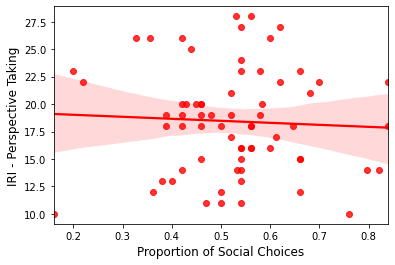

In [128]:
# prop social // iri_pt
pyplot.scatter(unbal_prop_social, unbal_iri_pt)
pyplot.show()
unbal_covariance = cov(unbal_prop_social, unbal_iri_pt)
print(unbal_covariance)
corr, _ = pearsonr(unbal_prop_social, unbal_iri_pt)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(unbal_prop_social, unbal_iri_pt)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
unbal_prop_iri_pt= sns.regplot(x="prop_social",y="IRI_PT", data=unbal_wtpdata,color="red");
unbal_prop_iri_pt.set_xlabel('Proportion of Social Choices',fontsize=12)
unbal_prop_iri_pt.set_ylabel('IRI - Perspective Taking',fontsize=12)
unbal_prop_iri_pt.figure.savefig('unbal_prop_iri_pt_scatter.svg')

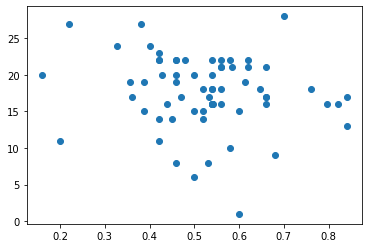

[[ 1.84468334e-02 -1.11934119e-01]
 [-1.11934119e-01  2.41465400e+01]]
Pearsons correlation: -0.168
p value: 0.1749
Accept null hypothesis that the means are equal.


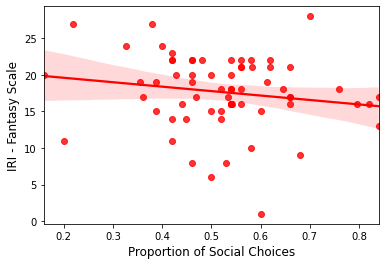

In [129]:
# prop social // iri_fs
pyplot.scatter(unbal_prop_social, unbal_iri_fs)
pyplot.show()
unbal_covariance = cov(unbal_prop_social, unbal_iri_fs)
print(unbal_covariance)
corr, _ = pearsonr(unbal_prop_social, unbal_iri_fs)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(unbal_prop_social, unbal_iri_fs)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
unbal_prop_iri_fs= sns.regplot(x="prop_social",y="IRI_FS", data=unbal_wtpdata,color="red");
unbal_prop_iri_fs.set_xlabel('Proportion of Social Choices',fontsize=12)
unbal_prop_iri_fs.set_ylabel('IRI - Fantasy Scale',fontsize=12)
unbal_prop_iri_fs.figure.savefig('unbal_prop_iri_fs_scatter.svg')